In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import numpy as np

import pandas as pd


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.rcParams['figure.figsize'] = (20, 9)
plt.rcParams['font.size'] = 12

In [4]:
housing_data = pd.read_csv("kc_house_data.csv")
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
from sklearn.model_selection import train_test_split

#If date is to be used must convert it to numeric type
X = housing_data.drop(['price','id','date'],axis=1)

y = housing_data['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15949,2,1.00,930,10505,1.0,0,0,3,6,930,0,1930,0,98148,47.4337,-122.329,1520,8881
16409,2,1.00,700,6000,1.0,0,0,3,6,700,0,1943,0,98055,47.4671,-122.212,1320,6000
14668,3,1.00,1580,3840,2.0,0,0,3,8,1580,0,1908,0,98102,47.6192,-122.319,1680,2624
6877,3,2.25,1646,12414,2.0,0,0,3,7,1646,0,1996,0,98038,47.3630,-122.035,1654,8734
20213,3,3.25,1450,1468,2.0,0,0,3,8,1100,350,2009,0,98126,47.5664,-122.370,1450,1478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,3,2.00,1850,8208,1.0,0,0,4,7,1180,670,1970,0,98023,47.3109,-122.362,1790,8174
7291,3,1.75,2190,7021,1.0,0,2,4,7,1390,800,1953,0,98178,47.5033,-122.232,2180,7155
17728,4,1.50,1580,10260,1.0,0,0,4,7,1030,550,1955,0,98007,47.5984,-122.147,1520,7000
7293,3,2.00,1410,6600,1.0,0,0,4,7,1410,0,1990,0,98042,47.3596,-122.089,1750,7150


id               0.016797
price            1.000000
bedrooms         0.308338
bathrooms        0.525134
sqft_living      0.702044
sqft_lot         0.089655
floors           0.256786
waterfront       0.266331
view             0.397346
condition        0.036392
grade            0.667463
sqft_above       0.605566
sqft_basement    0.323837
yr_built         0.053982
yr_renovated     0.126442
zipcode          0.053168
lat              0.306919
long             0.021571
sqft_living15    0.585374
sqft_lot15       0.082456
Name: price, dtype: float64

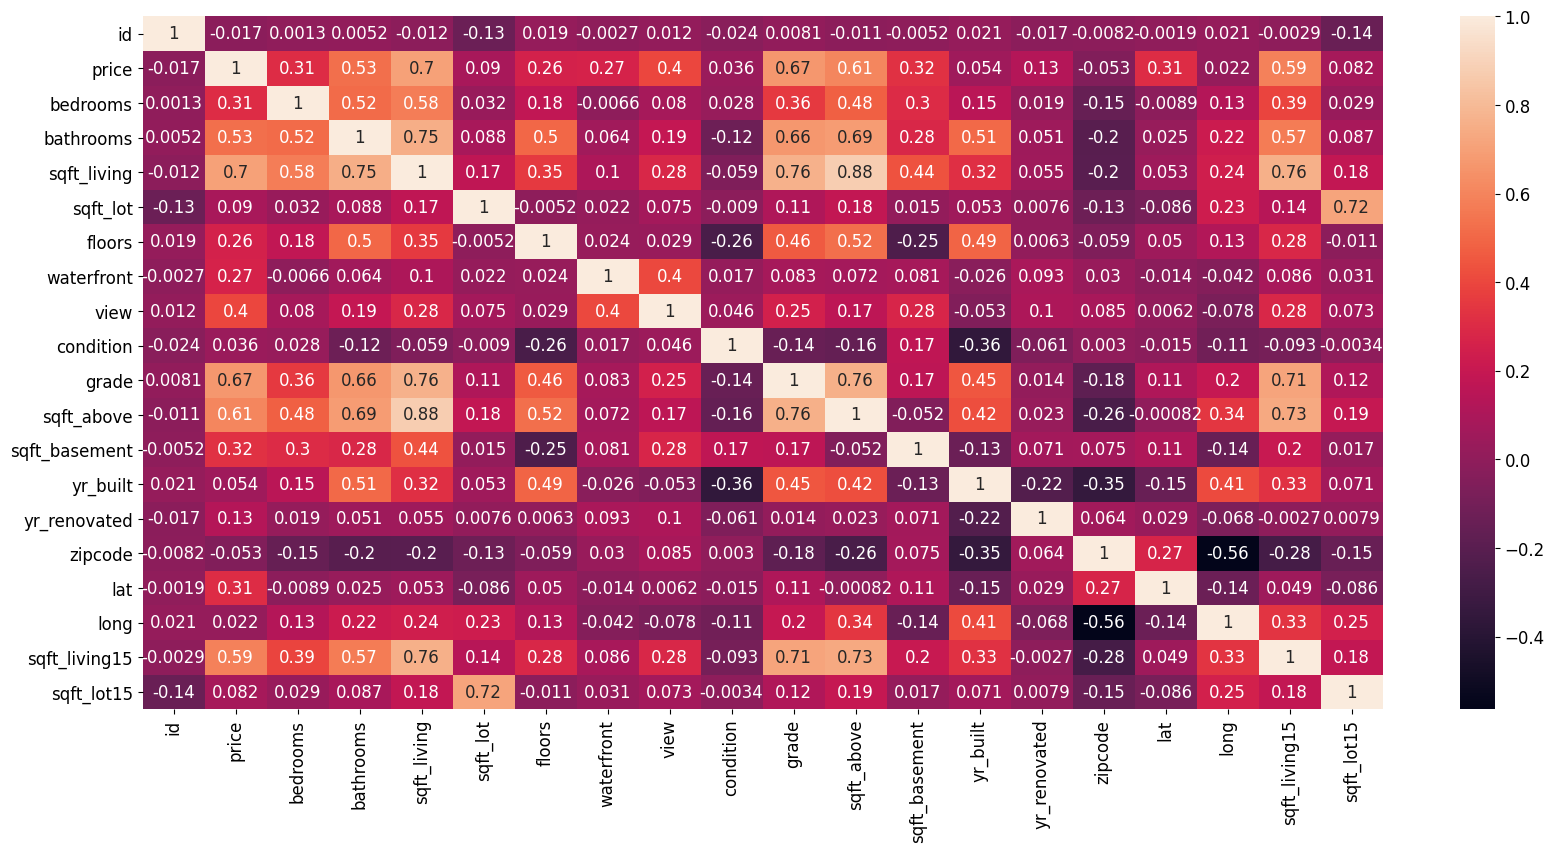

In [6]:
correlation = housing_data.corr()
sns.heatmap(correlation,annot=True)
abs(correlation["price"])

In [6]:
from sklearn import linear_model as lm
model = lm.LinearRegression(fit_intercept = True)
model.fit(X_train,y_train)
print(f"Training score: {model.score(X_train,y_train)}")
print(f"Test score: {model.score(X_test,y_test)}")

Training score: 0.6983441426370021
Test score: 0.7027629185607405


Best alpha using Lasso 1364160.245131511
Best score using Lasso 0.5225403948681554
['sqft_lot15' 'sqft_living15' 'long' 'lat' 'zipcode' 'yr_renovated'
 'yr_built' 'sqft_basement']


,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,0,1933,0,98028,47.7379,-122.233,2720,8062
3,910,1965,0,98136,47.5208,-122.393,1360,5000
4,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...
21608,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,0,2004,0,98027,47.5345,-122.069,1410,1287


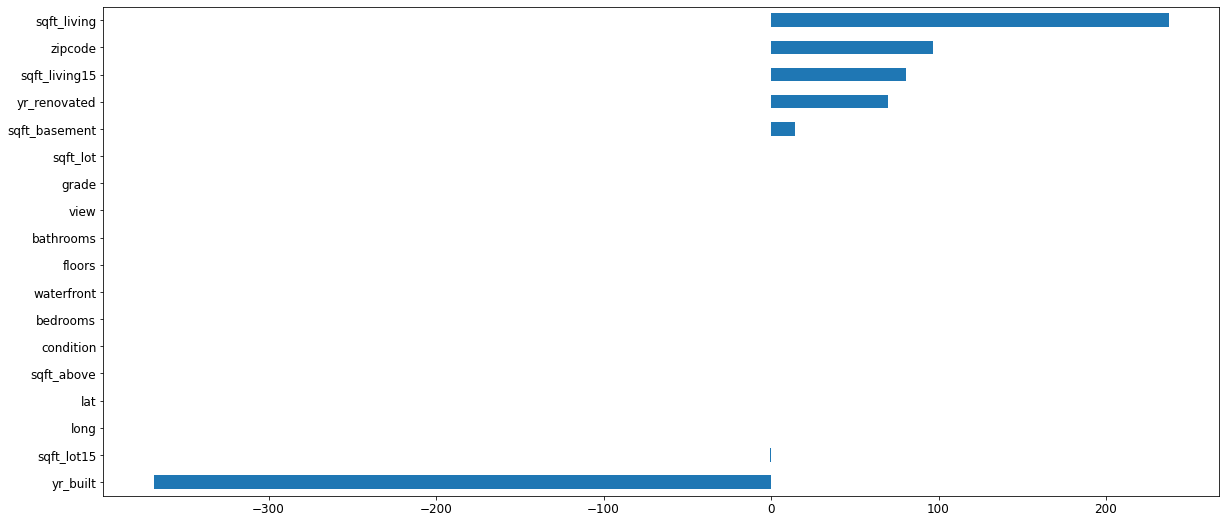

In [7]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X,y)

print(f"Best alpha using Lasso {reg.alpha_}")
print(f"Best score using Lasso {reg.score(X,y)}")
coef = pd.Series(reg.coef_,index= X.columns)
features = X.columns
importance = np.abs(coef)
importance = np.sort(importance)
print(np.array(features)[importance>0][::-1])
imp_coef = coef.sort_values()

fig = imp_coef.plot(kind="barh")
X_new = X[np.array(features)[importance>0]]
X_new

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2)
model= lm.LinearRegression(fit_intercept = True)
model.fit(X_train,y_train)
print(f"Training score with variables from Lasso {model.score(X_train,y_train)}")
print(f"Test score with variables from Lasso {model.score(X_test,y_test)}")

Training score with variables from Lasso 0.47428639554152685
Test score with variables from Lasso 0.49099239208097023
